<a href="https://colab.research.google.com/github/ReddySameer/tensorflow/blob/main/08_intro_NLP_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP  Fundamentals

* NLP derive information out of natural language
* Sequence of texts




In [1]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-05 21:48:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-05 21:48:42 (55.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Get Text Data set

* Kaggles Introduction to NLP dataset

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2024-06-05 21:49:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.212.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2024-06-05 21:49:05 (64.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df.shape

(7613, 5)

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [11]:
import random
random_index = random.randint(0, len(train_df) -5) #  dont go beyond the end of data
for row in train_df_shuffled[["text", "target"]] [random_index:random_index+5].itertuples(): # Get 5 samples, use itertuples to return tuples of text and targets
  _, text, target = row
  print(f"Target: {target}", "real disaster" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")

Target: 1 real disaster
Text: 
Refugio oil spill may have been costlier bigger than projected http://t.co/xcoLwUGFjg

Target: 1 real disaster
Text: 
@SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!

Target: 0 (not real disaster)
Text: 
@jake_blight @WeAlIlKnowA you cunt

Target: 1 real disaster
Text: 
Floods cause damage and death across Asia | All media content | http://t.co/a2myUTpDiQ | 05.08.2015 http://t.co/XrSkT0s9lz

Target: 0 (not real disaster)
Text: 
#Camera #Art #Photography http://t.co/TJGxDc3D5p #0215 New BoltåÊCyclone DR PP-400DR Dual Outlet Power PackåÊFor External Camera Flash

$30Û_



# Split data into training and validation sets


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                              train_df_shuffled["target"].to_numpy(),
                                                              test_size=0.1,
                                                              random_state=42)

In [14]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
train_sentences.shape

(6851,)

In [16]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Tokenization Vs Embedding

* Convert text to numbers
* Tokenization
* Embedding - create a matrix of feature vector for each token

# Text Vectorization

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=None,  # how many words in the sentence
                                       standardize='lower_and_strip_punctuation',
                                       split="whitespace",
                                       ngrams=None, # create group of n-words
                                       output_mode="int", # data type to map tokens to numbers
                                       output_sequence_length=None, # how long the sequence is
                                       )


In [19]:
# Find the average number of tokens (Words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# set vectorizatoin variables

max_vocab_length = 10000
max_length = 15 # max length of words the sequence that can be tokenized

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length=max_length
                                    )


In [21]:
text_vectorizer.adapt(train_sentences)

In [22]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
random_sentence = random.choice(train_sentences)
print(f"original text:\n{random_sentence}  \
\nVectorized version:\n")
text_vectorizer([random_sentence])

original text:
@MrMikeEaton @Muazimus_Prime hill hill mountain volcano of hell mountain hill hil.  
Vectorized version:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,    1, 1841, 1841, 1118,  524,    6,  603, 1118, 1841,    1,
           0,    0,    0,    0]])>

In [24]:
# Get the unique words in the Vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all teh unique words in the
top_5_words = words_in_vocab[:5]
bottom_t_words = words_in_vocab[-5:]
len(words_in_vocab), top_5_words, bottom_t_words

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

# Embedding - rich numerical representation of words which are learnt during training

Tensorflow Embedding layer

* `input_dim` - size of the vocabulary
* `output_dim` - the size of the output emedding layer -- the size of the token
* `input_length` = lenght of the sequence passed to the embedding layer


In [25]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, # input shape
                            output_dim=128, # output shape
                             embeddings_initializer="uniform",
                            input_length= max_length # how long is each input
                             )
embedding

In [26]:
random_sentence = random.choice(train_sentences)
print(f"Original text: \n {random_sentence} \
\n\n Embedded Version: ")

# Embed the random sentence -> turn positive integers  into dense vecotrs of fixed size
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text: 
 *screams* http://t.co/PU7C4Hhbxj 

 Embedded Version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00889411,  0.03526893, -0.02022727, ...,  0.02494402,
         -0.04878223,  0.04272855],
        [ 0.0339132 ,  0.01995165,  0.04579498, ...,  0.03962151,
         -0.03959912, -0.01229545],
        [-0.00806383,  0.02477637,  0.03043966, ...,  0.02391838,
         -0.02000951, -0.02430079],
        ...,
        [-0.00806383,  0.02477637,  0.03043966, ...,  0.02391838,
         -0.02000951, -0.02430079],
        [-0.00806383,  0.02477637,  0.03043966, ...,  0.02391838,
         -0.02000951, -0.02430079],
        [-0.00806383,  0.02477637,  0.03043966, ...,  0.02391838,
         -0.02000951, -0.02430079]]], dtype=float32)>

# Check out the single token embedding

In [27]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 8.89410824e-03,  3.52689289e-02, -2.02272665e-02, -1.23015530e-02,
        -1.61242373e-02,  1.36491545e-02, -2.27263216e-02, -3.17453891e-02,
         5.04028797e-03,  2.07928084e-02, -3.06861997e-02, -2.93068960e-03,
         1.51581876e-02,  2.50470638e-03, -3.72732505e-02,  4.09553163e-02,
        -2.45612152e-02,  4.53420542e-02,  4.23934311e-03,  2.83255093e-02,
         3.78993414e-02,  1.24522820e-02, -1.54711120e-02, -4.09335382e-02,
        -3.58147621e-02, -1.35691538e-02,  4.34004143e-03,  4.55265380e-02,
        -1.79916508e-02, -4.92403768e-02,  2.92001851e-02, -2.83710249e-02,
         1.04998834e-02, -3.20141390e-03,  1.09337270e-04,  8.53528827e-03,
         3.83712910e-02, -2.43069064e-02, -3.93010676e-04, -6.95966184e-04,
        -2.79605519e-02,  1.50422193e-02,  1.96177103e-02,  4.82396744e-02,
         4.47416790e-02,  4.65277582e-03, -9.01254267e-03,  1.66440643e-02,
        -3.40254307e-02, -3.33769470e-0

# Text Sequence to numbers

TF-IDF = Term Frequency - Inverse Document Frequency->  It can be defined as the calculation of how relevant a word in a series or corpus is to a text. -> frequency of words to determine how relevant those words
* Model0 Naive Bayes (baseline) sklearn ML Map https://scikit-learn.org/stable/tutorial/machine_learning_map/
* Model 1: Feed-Forward neural network (Dense Model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU Model (RNN)
* Model 4: Bidirectional-LSTM Model (RNN)
* Model 5: ID Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub PRetrained Feature Extractor (using transfer learning NLP)
* Model 7: Similar to Model6 with 10% model data

In [28]:
#Model 0: Creating a Baseline Model
# sklearn's Multinomial Naive Bayes using the TF-IDF formaula to convert words to numbers


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
    ("clf", MultinomialNB()) # clf - classifier - model to text
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f" the baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

 the baseline model achieves an accuracy of: 79.27%


In [31]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# Create a function to evaluate the predictions

* Accuracy
* Precision
* Recall
* F1 Score



In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results (y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score for the binary classification model
  """

  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  #  calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred)

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision[0],
                   "recall": model_recall[0],
                   "f1": model_f1[0]
                   }

  return model_results

In [45]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# A Simple Dense Model

* Create a tensor board callback.


In [46]:
from helper_functions import create_tensorboard_callback

# create directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [47]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x = embedding(x)
#x = layers.GlobalAveragePooling1D()(x) # GlobalAveragePooling1D is for one dimensional data
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # need binary outputs, use sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [48]:
inputs.shape, outputs.shape

(TensorShape([None, 1]), TensorShape([None, 1]))

In [49]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [50]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [52]:
model_1.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
train_sentences.shape, train_labels.shape, val_labels.shape, val_sentences.shape

((6851,), (6851,), (762,), (762,))

In [53]:
train_labels.shape
train_labels_exp = tf.expand_dims(train_labels, axis=-1)
train_labels.shape, train_labels_exp.shape, train_sentences.shape, SAVE_DIR

((6851,), TensorShape([6851, 1]), (6851,), 'model_logs')

In [54]:
val_labels.shape

(762,)

In [55]:
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])


Saving TensorBoard log files to: model_logs/simple_dense_model/20240605-215851
Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.4853 - accuracy: 0.8837 - val_loss: 0.4778 - val_accuracy: 0.7887
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2833 - accuracy: 0.9235 - val_loss: 0.4481 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2082 - accuracy: 0.9385 - val_loss: 0.4576 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1637 - accuracy: 0.9520 - val_loss: 0.4728 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1319 - accuracy: 0.9606 - val_loss: 0.4953 - val_accuracy: 0.7887


In [56]:
# with GlobalMaxpool1d
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7887


[0.49525052309036255, 0.7887139320373535]

In [57]:
# with GlobalAveragePooling1D
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7887


[0.49525052309036255, 0.7887139320373535]

In [58]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 6ms/step


(762, 1)

In [59]:
model_1_pred_probs[0]

array([0.36279994], dtype=float32)

In [60]:
# Convert model Prediciton probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [62]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7708779443254818,
 'recall': 0.8695652173913043,
 'f1': 0.8172531214528945}

In [63]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [64]:
model_1_results_values = [str(value) for value in model_1_results.values()]
model_1_results_values

['78.87139107611549',
 '0.7708779443254818',
 '0.8695652173913043',
 '0.8172531214528945']

In [65]:
import numpy as np

model_1_results_values = [str(value) for value in model_1_results.values()]
baseline_results_values = [str(value) for value in baseline_results.values()]

comparison = model_1_results_values > baseline_results_values
comparison

False

# Visualize Model Embedding

In [66]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [67]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [68]:
# get the weight matrix of embedding layer
# these are the numerical representations of each token in the training data, from 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

# To visualize the tokens after the embedding

* Word Embedding:
https://www.tensorflow.org/text/guide/word_embeddings

* Word2Vec:
https://jalammar.github.io/illustrated-word2vec/


In [115]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [116]:
#Download files from colab and upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Recurrent Neural Network

* Used for Sequence Data
* The Premise of a RNN is to use teh representation of a previous input to aid the reprentation of a later input

* The Unreasonable Effectiveness of Recurrent Neural Networks:
https://karpathy.github.io/2015/05/21/rnn-effectiveness/

* Understanding LSTM Networks:
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

# LSTM - Long Short Term Memory

Input(Text) -> tokenize -> embedding ->layers (RNNs/Dense) -> output (label probability)

In [69]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.LSTM(64, return_sequences=True) (x) # To use RNNs, set return_sequences to true, so that it passes the input to the subsequent inputs
#print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid") (x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 64)
(None, 64)


In [70]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [71]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [72]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240605-222726
Epoch 1/5
215/215 [==============================] - 17s 42ms/step - loss: 0.3392 - accuracy: 0.8485 - val_loss: 0.5194 - val_accuracy: 0.7913
Epoch 2/5
215/215 [==============================] - 8s 38ms/step - loss: 0.2121 - accuracy: 0.9199 - val_loss: 0.5766 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1523 - accuracy: 0.9432 - val_loss: 0.6566 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 8s 37ms/step - loss: 0.1159 - accuracy: 0.9590 - val_loss: 0.7878 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0873 - accuracy: 0.9666 - val_loss: 0.9620 - val_accuracy: 0.7717


In [73]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.00925595],
       [0.5971765 ],
       [0.99733615],
       [0.00427794],
       [0.00155161],
       [0.9996934 ],
       [0.59401983],
       [0.99983436],
       [0.9998499 ],
       [0.06578893]], dtype=float32)

In [74]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [75]:
model_2_results = calculate_results(y_true= val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.16535433070865,
 'precision': 0.7564102564102564,
 'recall': 0.855072463768116,
 'f1': 0.802721088435374}

In [76]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# Model 3 GRU layer - Gated Recurrent Unit

* GRU is similar features to an LSTM Cell but has fewer parameters



In [77]:
from tensorflow.keras import layers
inputs = layers.Input(tf.shape(1,), dtype=tf.string)
print(inputs.shape)
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
#x = layers.GRU(64, return_sequences=True)(x)
#print(x.shape)
#x = layers.LSTM(42,  return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
#print(x.shape)
#x= layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
print(outputs.shape)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None,)
(None, 15)
(None, 15, 128)
(None, 1)


In [78]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [79]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [80]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20240605-223301
Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.2432 - accuracy: 0.8847 - val_loss: 0.6915 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0985 - accuracy: 0.9664 - val_loss: 0.6929 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0789 - accuracy: 0.9724 - val_loss: 0.9045 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0637 - accuracy: 0.9753 - val_loss: 0.9766 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0528 - accuracy: 0.9764 - val_loss: 1.1051 - val_accuracy: 0.7677


In [83]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[8.0129495e-03],
       [9.2444116e-01],
       [9.9976510e-01],
       [9.0904877e-02],
       [3.2324260e-04],
       [9.9970371e-01],
       [3.5342526e-01],
       [9.9989992e-01],
       [9.9992937e-01],
       [2.0624824e-01]], dtype=float32)

In [84]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [85]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7570498915401301,
 'recall': 0.8429951690821256,
 'f1': 0.7977142857142856}

In [86]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# BiDirectional LSTM

* used for sequence model
* two LSTM Layers
* one for processing input in the forward direction
* one for processing in the backward direction
* when processing the input in both directions , the model understands the relationship between sequences
* used for NLP

In [87]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
#print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid") (x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15, 128)
(None, 128)


In [88]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               74496     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1354625 (5.17 MB)
Trainable par

In [89]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [90]:
model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240605-223933
Epoch 1/5
215/215 [==============================] - 16s 46ms/step - loss: 0.1549 - accuracy: 0.9349 - val_loss: 0.9264 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0695 - accuracy: 0.9727 - val_loss: 1.0762 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 10s 48ms/step - loss: 0.0518 - accuracy: 0.9771 - val_loss: 1.2472 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0479 - accuracy: 0.9780 - val_loss: 1.3407 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 9s 44ms/step - loss: 0.0444 - accuracy: 0.9793 - val_loss: 1.2216 - val_accuracy: 0.7730


In [91]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[5.5831473e-04],
       [8.5399860e-01],
       [9.9965346e-01],
       [7.3244058e-02],
       [6.5088039e-05],
       [9.9975413e-01],
       [3.2146850e-01],
       [9.9998105e-01],
       [9.9997509e-01],
       [1.1657165e-01]], dtype=float32)

In [92]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [93]:
model_4_results  = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'precision': 0.7505197505197505,
 'recall': 0.8719806763285024,
 'f1': 0.8067039106145251}

In [94]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# Convolutional Neural Networks for Text ( and other two types of sequences)

* Images are 2-D (height x width)
* Conv1D for 1-D
* Model_5 for Conv1D

In [95]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentences"])) # turn target sequence in to embedding
conv_1d = layers.Conv1D(filters=32,
                       kernel_size=5,
                        strides=1,
                       activation="relu",
                       padding="same") # defualt is valid, the output is smaller, no additional padding is added, so some data may not be processed, if it is `same` then the output is same, with same the padding is added so no data is missed
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [96]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.11936636, -0.04286112, -0.09565234, ..., -0.02448695,
         -0.16395873,  0.09961882],
        [-0.08484959,  0.13173047, -0.11403649, ..., -0.0049209 ,
         -0.08792873, -0.07467271],
        [-0.09170169, -0.0842571 , -0.1213997 , ..., -0.06056466,
         -0.12842655, -0.0739579 ],
        ...,
        [-0.14623939, -0.08146317, -0.11877692, ...,  0.15685022,
         -0.13245189, -0.09438855],
        [-0.14623939, -0.08146317, -0.11877692, ...,  0.15685022,
         -0.13245189, -0.09438855],
        [-0.14623939, -0.08146317, -0.11877692, ...,  0.15685022,
         -0.13245189, -0.09438855]]], dtype=float32)>

In [97]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.00000000e+00, 4.95001003e-02, 7.05128312e-02, 0.00000000e+00,
         6.25720993e-03, 8.57434645e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 2.54398696e-02, 0.00000000e+00, 4.58102860e-03,
         1.82757109e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.34745613e-04, 4.88736480e-02, 1.62420079e-01, 0.00000000e+00,
         7.15680271e-02, 0.00000000e+00, 1.59763306e-01, 3.69037315e-02,
         0.00000000e+00, 1.05935037e-01, 1.07801072e-02, 8.02670568e-02,
         5.33385426e-02, 1.50231391e-01, 2.42542662e-02, 0.00000000e+00],
        [2.41710246e-03, 0.00000000e+00, 3.25685032e-02, 0.00000000e+00,
         3.77855487e-02, 3.23140435e-02, 1.57609470e-02, 0.00000000e+00,
         1.46534927e-02, 7.87758827e-03, 1.63428932e-02, 0.00000000e+00,
         1.30167082e-01, 3.28973867e-03, 0.00000000e+00, 1.87910683e-02,
         1.78297944e-02, 7.87720084e-04, 1.69236571e-01, 0.00000000e+0

In [98]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.0024171 , 0.11104853, 0.07051283, 0.        , 0.06323148,
        0.13345279, 0.04500683, 0.        , 0.14055532, 0.09006108,
        0.22353499, 0.00458103, 0.2369053 , 0.05880601, 0.10740575,
        0.17521076, 0.01782979, 0.13604179, 0.3516981 , 0.02001665,
        0.15588337, 0.12700465, 0.27596226, 0.03934016, 0.04363547,
        0.15383026, 0.24341275, 0.08026706, 0.1991013 , 0.15023139,
        0.02425427, 0.09361026]], dtype=float32)>

# Create 1 D convolutional layer to model sequences



In [99]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5, # kernal_size to look at 5 words at a time
                  strides=1,
                  activation="relu",
                  padding="valid")(x)
x=layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu") (x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")


In [101]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [102]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 1)              

In [103]:
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20240605-224217
Epoch 1/5
215/215 [==============================] - 7s 28ms/step - loss: 0.1510 - accuracy: 0.9504 - val_loss: 0.8421 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0711 - accuracy: 0.9750 - val_loss: 0.9738 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0584 - accuracy: 0.9780 - val_loss: 1.0443 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0527 - accuracy: 0.9785 - val_loss: 1.1224 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0496 - accuracy: 0.9804 - val_loss: 1.1541 - val_accuracy: 0.7572


In [104]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[5.5171058e-02],
       [6.4872658e-01],
       [9.9978328e-01],
       [9.1846533e-02],
       [5.4626930e-06],
       [9.8254234e-01],
       [9.2266017e-01],
       [9.9983323e-01],
       [9.9999887e-01],
       [2.0107749e-01]], dtype=float32)

In [105]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [110]:
model_5_results  = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.7217847769029,
 'precision': 0.75054704595186,
 'recall': 0.8285024154589372,
 'f1': 0.7876004592422503}

In [111]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

# Model 6 Tensorflow Hub Pretrained Sentence Encoder

In [112]:
sample_sentence, str(sample_sentence)

("There's a flood in my street!", "There's a flood in my street!")

In [113]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])


tf.Tensor(
[ 0.03596691 -0.08579469 -0.01152743  0.00525982 -0.01852172 -0.05042012
 -0.03616941  0.00534677  0.04805917  0.04690744 -0.0372333  -0.01149546
  0.04352415  0.07050991  0.0709376  -0.08180431  0.00871717 -0.04654121
 -0.02245776  0.04686872  0.00202256  0.03099072  0.02043563  0.06392168
 -0.07641086  0.08421179 -0.04576042 -0.00106165 -0.02059416  0.01241106
  0.05727539  0.0381562  -0.02742118 -0.00354347 -0.09832586 -0.01244854
  0.0386563   0.05031953 -0.02362506  0.00321848  0.03225209  0.00738095
  0.04473104 -0.00412236  0.01151601  0.02837724  0.00060139 -0.05903354
 -0.00494347 -0.00688527], shape=(50,), dtype=float32)


In [114]:
embed_samples[0].shape

TensorShape([512])

In [116]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [117]:
from  tensorflow.keras import layers

In [118]:
# Create Model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [119]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [194]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [120]:
# Train a classifier on top of the USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20240605-224834
Epoch 1/5
215/215 [==============================] - 9s 21ms/step - loss: 0.4966 - accuracy: 0.7878 - val_loss: 0.4533 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4148 - accuracy: 0.8158 - val_loss: 0.4389 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4014 - accuracy: 0.8196 - val_loss: 0.4380 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3926 - accuracy: 0.8264 - val_loss: 0.4296 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3860 - accuracy: 0.8289 - val_loss: 0.4261 - val_accuracy: 0.8163


In [121]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.18537423],
       [0.7791972 ],
       [0.9878222 ],
       [0.20037615],
       [0.7502335 ],
       [0.7656672 ],
       [0.9838283 ],
       [0.9810829 ],
       [0.9464213 ],
       [0.0825728 ]], dtype=float32)

In [122]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [123]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [124]:

# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")



In [125]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8030973451327433,
 'recall': 0.8768115942028986,
 'f1': 0.8383371824480369}

In [82]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [126]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.63, Difference: 2.36
Baseline precision: 0.75, New precision: 0.80, Difference: 0.06
Baseline recall: 0.93, New recall: 0.88, Difference: -0.06
Baseline f1: 0.83, New f1: 0.84, Difference: 0.01


# Model_7 TF Hub Pretrained USE but with 10% of training data

Transfer learning helps even when the data set is small

In [127]:
# Create subset of trained data - 10%
train_10_percent  = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"]
train_labels_10_percent = train_10_percent["target"]
#train_sentences_10_percent.head(), len(train_sentences_10_percent), train_10_percent.head()
len(train_sentences_10_percent), len(train_labels_10_percent),

(761, 761)

# Clone Model

* https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model


In [128]:
import tensorflow as tf

model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [129]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [130]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE")
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [131]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [132]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_perent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_perent/20240605-225001
Epoch 1/5
24/24 [==============================] - 3s 49ms/step - loss: 0.6722 - accuracy: 0.6689 - val_loss: 0.6368 - val_accuracy: 0.7913
Epoch 2/5
24/24 [==============================] - 1s 22ms/step - loss: 0.6033 - accuracy: 0.7871 - val_loss: 0.5553 - val_accuracy: 0.7927
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5232 - accuracy: 0.7898 - val_loss: 0.4836 - val_accuracy: 0.8045
Epoch 4/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4648 - accuracy: 0.8068 - val_loss: 0.4368 - val_accuracy: 0.8150
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4284 - accuracy: 0.8081 - val_loss: 0.4072 - val_accuracy: 0.8176


In [133]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.21918964],
       [0.80314267],
       [0.91156435],
       [0.28523767],
       [0.8097583 ],
       [0.8550635 ],
       [0.902745  ],
       [0.9431972 ],
       [0.8258979 ],
       [0.07379805]], dtype=float32)

In [134]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [135]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 81.75853018372703,
 'precision': 0.8160919540229885,
 'recall': 0.857487922705314,
 'f1': 0.8362779740871614}

In [136]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8030973451327433,
 'recall': 0.8768115942028986,
 'f1': 0.8383371824480369}

In [137]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [150]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [151]:
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [152]:
import numpy as np
import pandas as pd


In [153]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
Name: count, dtype: int64

In [154]:
pd.Series(np.array(train_10_percent)).value_counts()

The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                             3
@mogacola @zamtriossu i screamed after hitting tweet                                                                                           1
RT to ruin @connormidd 's day.  http://t.co/krsy54XMMC                                                                                         1
--thus making @FemaleGilgamesh's assault useless.\nThe spears collided with the dark force however did not penetrate.\n\nDue to the dark --    1
It's a heat wave. #Squad #RevItUp #PizzaRev http://t.co/bp8bm8xSXw                                                                             1
                                                                                                                                              ..
Colorado movie massacre trial jurors reach verdict on mitigating factors http://t.co/75VLsw85GI http://t.co/txY3US2Ejs            

In [155]:
train_df_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [156]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_perent_10_PERCENT_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_perent_10_PERCENT_split/20240605-225243


ValueError: Data cardinality is ambiguous:
  x sizes: 761
  y sizes: 685
Make sure all arrays contain the same number of samples.

In [217]:
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1D": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.748062,0.932367,0.830108
1_simple_dense,79.265092,0.773504,0.874396,0.820862
2_lstm,77.690289,0.755230,0.871981,0.809417
3_gru,75.984252,0.774347,0.787440,0.780838
4_bidirectional,75.984252,0.748387,0.840580,0.791809
5_conv1D,75.984252,0.745223,0.847826,0.793220
6_tf_hub_use_encoder,81.496063,0.800000,0.879227,0.837745
7_tf_hub_use_encoder_10_percent,87.532808,0.868360,0.908213,0.887839


In [218]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

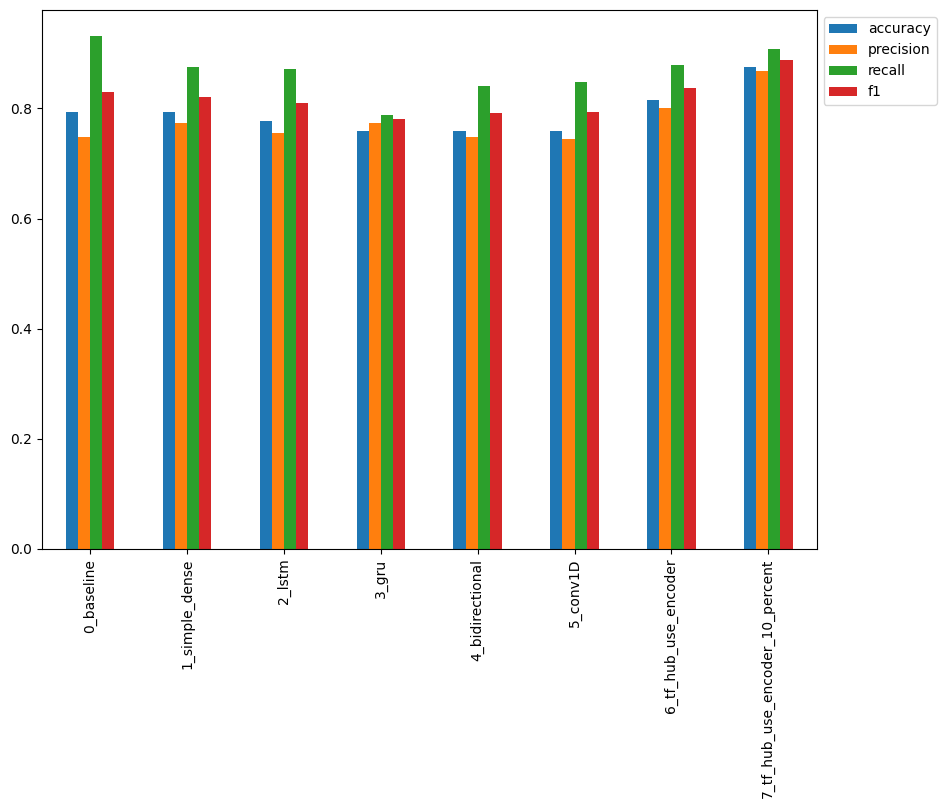

In [219]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

In [1]:
# sort model results by F1 score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

NameError: name 'all_model_results' is not defined

# Saving and Loading Trained Model

* The HDF5 format -> Hierarchical Data Format V5
* The savedmodel format

In [157]:
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [158]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [159]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 3s 22ms/step - loss: 0.4261 - accuracy: 0.8163


[0.42609480023384094, 0.8162729740142822]

In [160]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8030973451327433,
 'recall': 0.8768115942028986,
 'f1': 0.8383371824480369}

In [162]:
# Save TF Hub Sentence encoder model to SAveModel format
model_6.save("model_6_SavedModel_format")

In [163]:
# load model 6 from saved model format

loaded_model_6_savedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [164]:
loaded_model_6_savedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 28ms/step - loss: 0.4261 - accuracy: 0.8163


[0.42609480023384094, 0.8162729740142822]

# to save to local harddrive
from google.colab import files
files.download(filename)

In [165]:
# to save to local harddrive
from google.colab import files
files.download("model_6.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2024-06-05 23:27:35--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.162.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  37.4MB/s    in 27s     

2024-06-05 23:28:02 (34.5 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [167]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [168]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [169]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 2s 23ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [176]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred":  tf.squeeze(model_6_pretrained_preds),
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)
                       })
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [179]:
# find the wrong prediction
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10] # False positives, model predicted 1 when it shoudl be 0 (target value)

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [181]:
most_wrong.tail() # False negatives, model predicted 0 when it shoudl be 1 (target value)

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


#Target = description
0 = not disaster
1 = disaster

In [182]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957082748413
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769820332527161
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001670837402
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272131681442261
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

In [183]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [188]:
# making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text: \n{test_sample}")
  print("-----\n")

1/1 [==============================] - 0s 74ms/step
Pred: 1, Prob: 0.5234189033508301
Text: 
I deserve a goddamn medal for dealing with this basement flood without panicking
-----

1/1 [==============================] - 0s 58ms/step
Pred: 1, Prob: 0.7889112234115601
Text: 
Last night was a ball! Atop a 40 ft. fire truck latter!#NNO2015 http://t.co/0KTxo7HLne
-----

1/1 [==============================] - 0s 52ms/step
Pred: 0, Prob: 0.14823725819587708
Text: 
SCREAMING BECAUSE 5SOS IS IN TX
@5SOS
-----

1/1 [==============================] - 0s 48ms/step
Pred: 0, Prob: 0.03362930938601494
Text: 
Don't ruin a good today by thinking about a bad yesterday ????
-----

1/1 [==============================] - 0s 53ms/step
Pred: 1, Prob: 0.9728736281394958
Text: 
Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/1TVFfba95l http://t.co/ALjwAWkxPj
-----

1/1 [==============================] - 0s 56ms/step
Pred: 1, Prob: 0.8149272799491882
Text: 
Interesti

# The Concept of Speed and Score Tradeoff

In [189]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8030973451327433,
 'recall': 0.8768115942028986,
 'f1': 0.8383371824480369}

In [190]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.748062015503876,
 'recall': 0.9323671497584541,
 'f1': 0.8301075268817204}

In [193]:
# determine the time taken to make a prediction
import time
def pred_timer(model, samples):
  """
  determine the time taken to make a prediction
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [194]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 13ms/step


(0.40445618299963826, 0.0005307823923879768)

In [196]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model=model_0,
                                                            samples=val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.10250482599985844, 0.00013452076902868563)

In [197]:
model_6_pretrained_results = calculate_results(y_true= val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.8004385964912281,
 'recall': 0.8816425120772947,
 'f1': 0.8390804597701149}

Text(0, 0.5, 'F1-score')

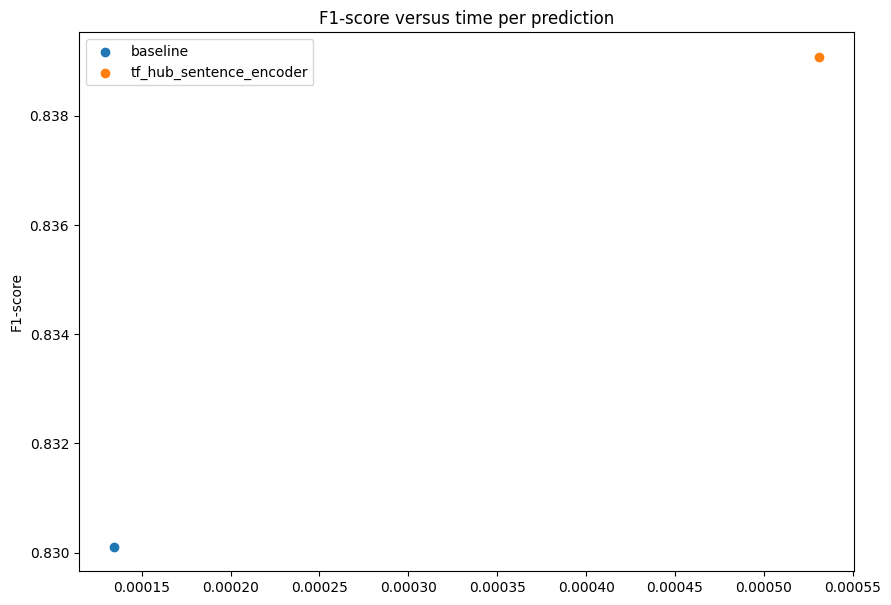

In [198]:
# Time per prediction with F1 score
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.ylabel("F1-score")
